In [37]:
from scipy import signal
import matplotlib.pyplot as plt
import numpy as np

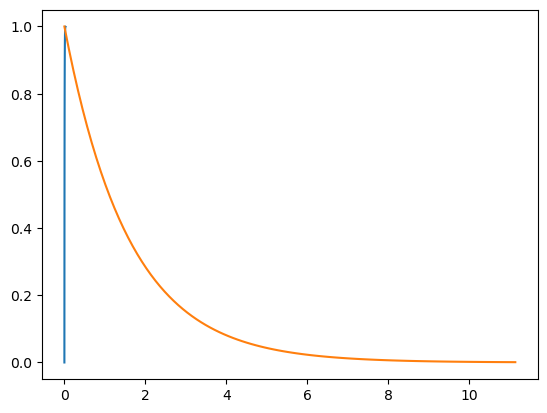

In [38]:
# Continuous transfer function
low_w0 = 2*np.pi*40
low_num = low_w0
low_den = [1, low_w0]
lowPass = signal.TransferFunction(low_num, low_den)
t, f = signal.step(lowPass)
plt.plot(t, f)
high_w0 = 2*np.pi*0.1
high_num = [1, 0]
high_den = [1, high_w0]
highPass = signal.TransferFunction(high_num, high_den)
tt, ff = signal.step(highPass)
plt.plot(tt, ff)
#print(lowPass, end="\n\n")
#print(highPass)

In [39]:
# Discrete transfer function
dt = 1.0/200.0
discreteLowPass = lowPass.to_discrete(dt, method='gbt', alpha=0.5)
discreteHighPass = highPass.to_discrete(dt, method='gbt', alpha=0.5)
print(discreteLowPass, end='\n\n')
print(discreteHighPass)

TransferFunctionDiscrete(
array([0.38586955, 0.38586955]),
array([ 1.        , -0.22826091]),
dt: 0.005
)

TransferFunctionDiscrete(
array([ 0.99843167, -0.99843167]),
array([ 1.        , -0.99686333]),
dt: 0.005
)


In [40]:
# Difference equation coefficients
low_b = discreteLowPass.num
low_a = -discreteLowPass.den
print("Filter coefficients b_i: " +  str(low_b))
print("Filter coefficients a_i: " +  str(low_a[1:]), end="\n\n")

high_b = discreteHighPass.num
high_a = -discreteHighPass.den
print("Filter coefficients b_i: " +  str(high_b))
print("Filter coefficients a_i: " +  str(high_a[1:]))

Filter coefficients b_i: [0.38586955 0.38586955]
Filter coefficients a_i: [0.22826091]

Filter coefficients b_i: [ 0.99843167 -0.99843167]
Filter coefficients a_i: [0.99686333]
